# Part I - (Loan Data Exploration)
## by Eniola Ogunmona

## Introduction
> This document explores a data set containing 113,937 loans with 81 variables on each loan, including loan amount, interest rate, current loan status, borrower income.



## Preliminary Wrangling


In [1]:
# Importing all packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading in dataset 
loan_df = pd.read_csv("prosperLoanData.csv")

In [3]:
# Let's see a sample of the dataset
loan_df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
11523,0D2E3596810362709E3F40B,1070205,2013-12-04 14:40:06.360000000,NaN,36,Current,NaN,0.12081,0.0930,0.0830,...,-30.21,0.00,0.00,0.00,0.0,1.0,1,1,100.0,276
68415,FD973543795384447380BC1,574334,2012-04-01 15:21:31.173000000,NaN,12,Completed,2013-08-13 00:00:00,0.25214,0.1739,0.1639,...,-13.30,0.00,0.00,0.00,0.0,1.0,0,0,0.0,22
4660,4880358035714667442A806,789340,2013-05-26 09:37:32.077000000,NaN,60,Current,NaN,0.31848,0.2916,0.2816,...,-28.99,0.00,0.00,0.00,0.0,1.0,0,0,0.0,27
8612,E2C53488353034238794A11,466634,2010-07-15 15:19:06.157000000,NaN,36,Chargedoff,2012-08-27 00:00:00,0.29588,0.2725,0.2625,...,-96.93,0.00,4054.93,4054.93,0.0,1.0,0,0,0.0,187
64160,50D03365096312871A9A4C4,30320,2006-08-09 22:22:03.823000000,E,36,Completed,2009-08-27 00:00:00,0.18927,0.1820,0.1770,...,-21.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,100
43701,4EF135948438427360A9965,999725,2013-11-07 08:02:58.500000000,NaN,36,Current,NaN,0.19859,0.1620,0.1520,...,-17.25,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
81729,F1DA3599738381335F80830,1124399,2014-01-09 17:16:25.327000000,NaN,36,Current,NaN,0.30131,0.2624,0.2524,...,-6.79,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
52185,E02636047393339732A28A7,1227002,2014-03-04 15:14:50.323000000,NaN,36,Current,NaN,0.20869,0.1715,0.1615,...,0.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
78827,34D53582002973255DCD9EC,818450,2013-06-23 09:44:26.677000000,NaN,36,Past Due (1-15 days),NaN,0.27285,0.2346,0.2246,...,-86.81,0.00,0.00,0.00,0.0,1.0,0,0,0.0,128
24506,6AC23559923152635AC4361,648012,2012-10-01 15:28:43.190000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,-34.87,-109.44,0.00,0.00,0.0,1.0,0,0,0.0,59


In [4]:
# What is the shape of the dataset
loan_df.shape

(113937, 81)

In [5]:
# Let's see some more info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# Let's take a look at the summary statistics
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
# exploring categoricl variables
loan_df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [8]:
# exploring categoricl variables
loan_df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [9]:
# exploring categoricl variables
loan_df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [10]:
# Converting "ListingCreationDate" to datetime object
loan_df["ListingCreationDate"] = pd.to_datetime(loan_df["ListingCreationDate"], format="%Y-%m-%d %H:%M:%S")

In [11]:
# Convert the "IncomeRange" and "CreditGrade" column from a plain object type into an ordered categorical type 
# List of ratings
ordinal_var_dict = {"IncomeRange": ['$0', "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", 
                "$100,000+", "Not employed", "Not displayed"],
                    "CreditGrade": ["AA", "A", "B", "C", "D", "E", "HR", "NC"]}
# Returns the types with the categories & orderedness and uses pandas.astype() to convert 
# from a plain object type into an ordered categorical type 
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loan_df[var] = loan_df[var].astype(ordered_var)

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, interest rate, current loan status, borrower income. Most variables are numeric in nature, but the variables credit grade and income range are ordered factor variables with the following levels
>
> Credit Grades: AA, A, B, C, D, E, HR, NC
>
> Income Range: \\$0, \\$1-24,999, \\$25,000-49,999, \\$50,000-74,999, \\$75,000-99,999, \\$100,000+, Not employed, Not displayed


### What is/are the main feature(s) of interest in your dataset?

> I am most interested in the factors that affect a loan’s outcome status

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The original amount of the loan and interest rate should have an important effect on the loan's outcome. I expect the range of income and credit grade to also have an effect

## Univariate Exploration

Let's take a look at the main variable of interest, loan status

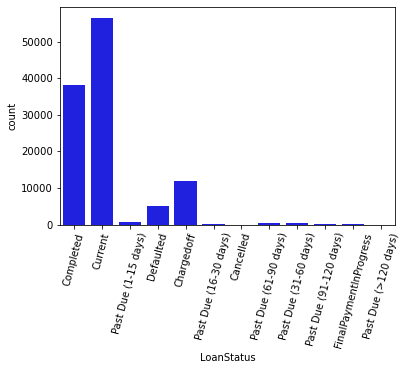

In [12]:
# using countplot to see count
sb.countplot(data=loan_df, x="LoanStatus", color="blue")
plt.xticks(rotation=75);

Let's group all buckets of Past Due Loans into one group

In [13]:
# Grouping all buckets containing PastDue Loans into one
loan_df["LoanStatus"] = loan_df["LoanStatus"].apply(lambda x: "".join(x.split()[:2]))

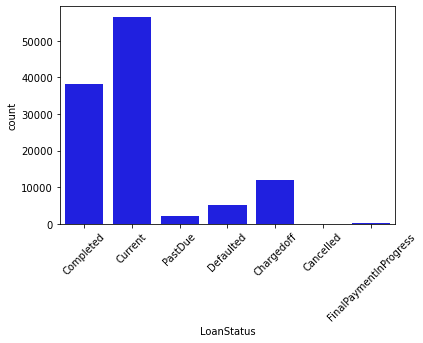

In [14]:
sb.countplot(data=loan_df, x="LoanStatus", color="blue")
plt.xticks(rotation=45);

Most of the loans are currently running and completed. A few loans are charged off, defaulted, past due, cancelled or final payment been made

Let's see the first predictor variable of interest: original amount of the loan

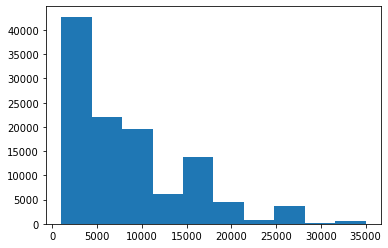

In [15]:
# Plotting a histogram to uderstand the distribution on a standard scale
plt.hist(data=loan_df, x="LoanOriginalAmount");

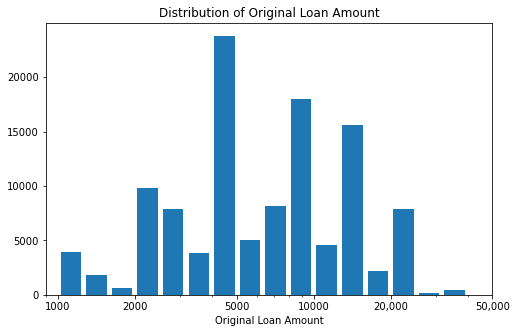

In [16]:
# Plotting a histogram using log scale
plt.figure(figsize=[8, 5])
bins = 10 ** np.arange(3, 5+0.3, 0.1)
plt.hist(data=loan_df, x="LoanOriginalAmount", bins=bins, rwidth = 0.8)
plt.xscale("log")
plt.xlim(900,4e4)
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1000', '2000', '5000', '10000', "20,000", "50,000"])
plt.title("Distribution of Original Loan Amount")
plt.xlabel("Original Loan Amount");

Loan original amount is a discrete variable and has a long tailed distribution with lot of the amount on the low end. Plotting on a log scale and adding gaps between bars helps to emphasize its discretness and we can see the distribution is unimodal with most of values falling a lttle below 5000.

Let's take a look at another predictor variable of interest: interest rate of loan

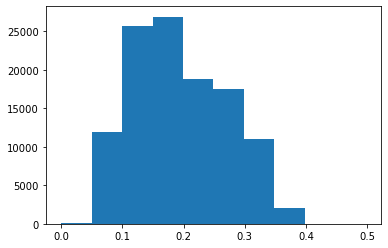

In [17]:
# plotting Interest Rate on a standard scale
plt.hist(data=loan_df, x="BorrowerRate");

Let's use a smaller bin size to better understand the distrbution and look other numeric variables too

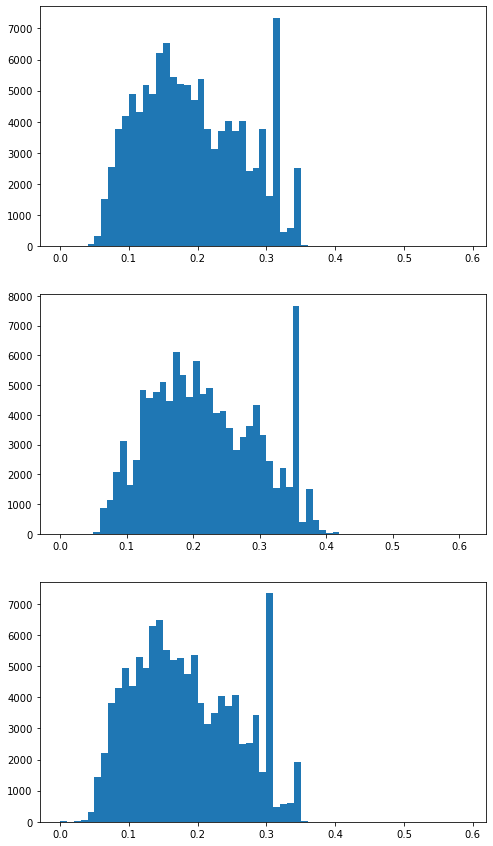

In [18]:
# setting a larger figure size for subplots and smaller bin sizes
plt.figure(figsize = [8,15])

plt.subplot(3, 1, 1) 
bins = np.arange(0, loan_df["BorrowerRate"].max()+0.1, 0.01)
plt.hist(data=loan_df, x="BorrowerRate", bins=bins);

# histogram on right, example of too-small bin size
plt.subplot(3, 1, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, loan_df["BorrowerAPR"].max()+0.1, 0.01)
plt.hist(data=loan_df, x="BorrowerAPR", bins=bins);

plt.subplot(3, 1, 3) # 1 row, 2 cols, subplot 2
bins = np.arange(0, loan_df["LenderYield"].max()+0.1, 0.01)
plt.hist(data=loan_df, x="LenderYield", bins=bins);


The shape of the Borrower Rate, Borrower APR, and Lender Yield distributions are very similar to one another. They right skewed and unimodal in nature. 

Let's explore categorical variables of interest: credit grade, income range and if income can be verified

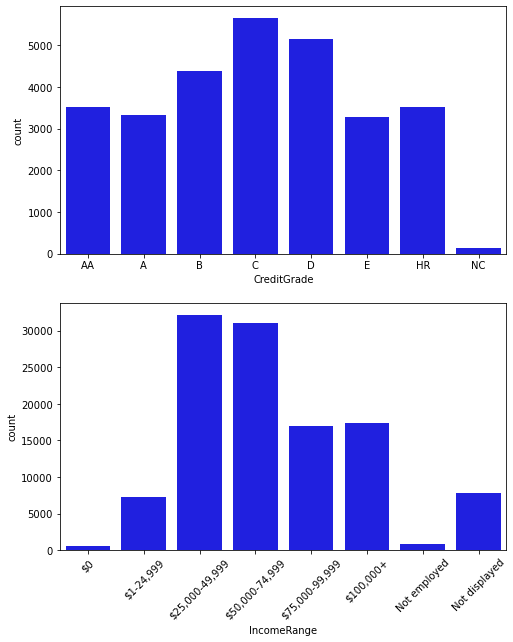

In [19]:
# let's plot all credit grade and income range together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=2, figsize = [8,10])

default_color = "blue"
sb.countplot(data=loan_df, x="CreditGrade", color = default_color, ax = ax[0])
sb.countplot(data=loan_df, x="IncomeRange", color = default_color, ax = ax[1])
plt.xticks(rotation=45)
plt.show()

Looking at `credit grade` rating C is most frequent followed by D then B, NC rating has the lowest count. Credit ratings helps to assess the risk of lending money to an individual, a higher rating (AA-B) means a lower risk on payment default. 

The `income range` falls in the \\$25,000 - \\$49,999 and \\$50,000 - \\$74,999 category, those in the $0 and not employed category are few

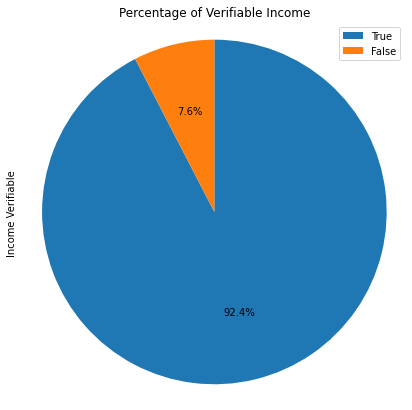

In [20]:
sorted_counts = loan_df["IncomeVerifiable"].value_counts()
plt.figure(figsize=(7,7))
plt.pie(sorted_counts, startangle = 90, counterclock = False, autopct='%1.1f%%')
plt.axis("square")
plt.title("Percentage of Verifiable Income")
plt.ylabel("Income Verifiable")
plt.legend(["True", "False"]);

About 92% percent of income can be verified, which could mean it's a important factor to be granted loan

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For loan status, the PastDue category was divided into 6 delinquency buckets, all buckets were grouped into one called PastDue. Loan status contains 7 buckets; Current, Completed, Chargedoff, Defaulted, PastDue, FinalPaymentInProgress and Cancelled

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Loan original amount was seen to be a discrete variable, it was plotted on a log scale and gaps added between bars to emphasize its discretness which helped in understanding the distribution better.

## Bivariate Exploration

Let's begin by seeing how original amount of loan and interest rate are related to one another for all of the data

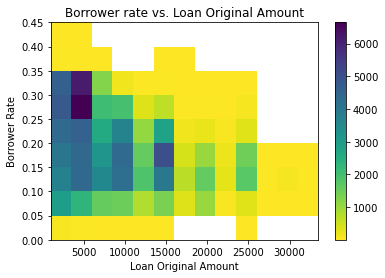

In [21]:
# Using a heat map to see the relationship between original amount of loan and interest rate

# Specifying bin edges 
bins_x = np.arange(1000, 35000+1000, 2500) 
bins_y = np.arange(0, 0.5, 0.05)

plt.hist2d(data=loan_df, x="LoanOriginalAmount", y="BorrowerRate", cmin=0.55, cmap="viridis_r", bins = [bins_x, bins_y])
plt.colorbar()
plt.title("Borrower rate vs. Loan Original Amount")
plt.xlabel("Loan Original Amount")
plt.ylabel("Borrower Rate");

We can see a negative relationship between loan original amount and borrower rate. The original amount borrowed are mostly low range between 1000 - 12000 with interest rates between 0.1 - 0.35.

What is the relationship between monthly loan payment and the original amount of the loan?

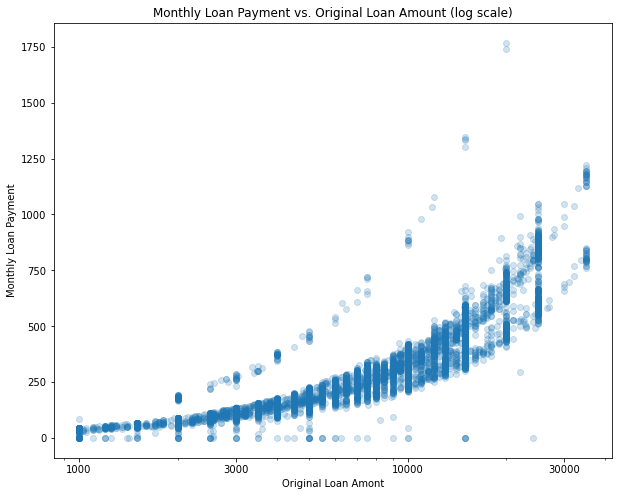

In [22]:
# Taking a random sample of 10000 data points
samples = np.random.choice(loan_df.shape[0], 10000, replace = False)
loan_samp = loan_df.loc[samples,:]

# Let's see the relationship on a scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data=loan_samp, x="LoanOriginalAmount", y="MonthlyLoanPayment", alpha = 0.2)
plt.xscale("log")
plt.xticks([1e3, 3e3, 1e4, 3e4], ['1000', '3000', '10000', '30000'])
plt.title("Monthly Loan Payment vs. Original Loan Amount (log scale)")
plt.xlabel("Original Loan Amont")
plt.ylabel("Monthly Loan Payment");

We can see a positive relationship between monthly loan payment and the original amount of the loan which means the higher the loan taken the higher monthly payment made. This is actually expected.

Let visualize how loan amount interacts with the categorical variables

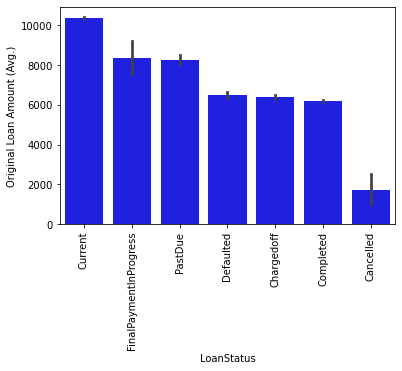

In [23]:
# Let's see a summary of loan status against the original borrowed
order = ["Current", "FinalPaymentInProgress", "PastDue", "Defaulted", "Chargedoff", "Completed", "Cancelled"]
sb.barplot(data=loan_df, x="LoanStatus", y="LoanOriginalAmount", color="blue", order=order)
plt.title("")
plt.ylabel("Original Loan Amount (Avg.)")
plt.xticks(rotation=90);

We can see on the average that most of the loan are not yet due for payment (still running), final payment for an average of 800 worth of loan are being made with about the same amount for loan that have past thier due date but not paid.



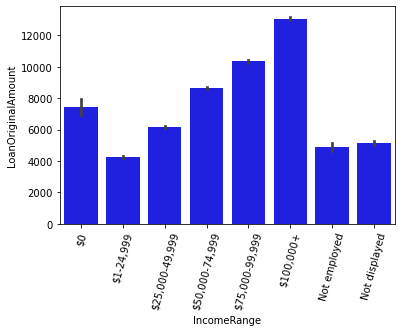

In [24]:
# Let's see a summary of income range against the original borrowed
sb.barplot(data=loan_df, x="IncomeRange", y="LoanOriginalAmount", color="blue")
plt.xticks(rotation=75);

We can see the highest that higher loans are taken by thoose who report higher ranges of income, this makes sense.

Let's see the distribution of categorical variables against original amount of the loan

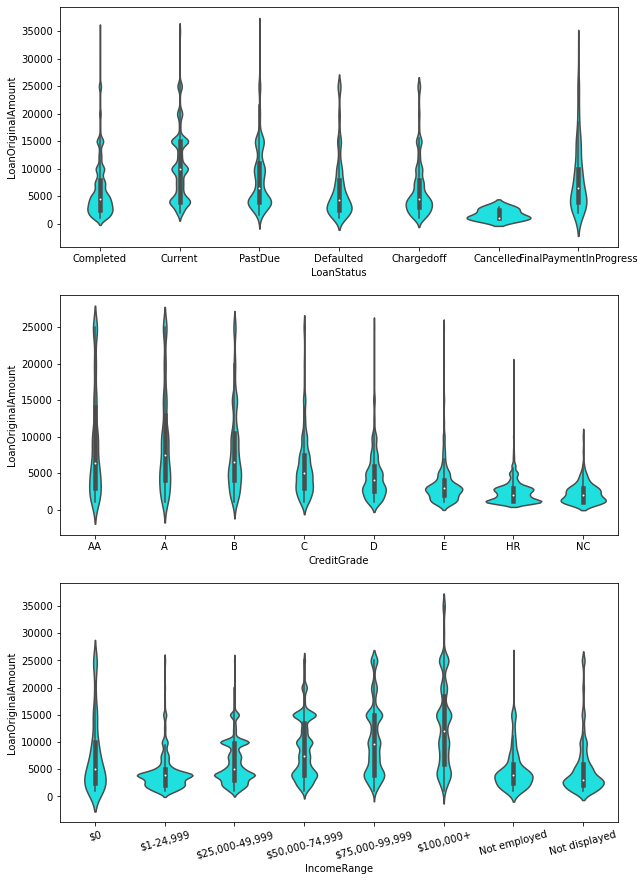

In [25]:
fig, ax = plt.subplots(nrows=3, figsize = [10, 15])

default_color = "cyan"
sb.violinplot(data=loan_df, x="LoanStatus", y="LoanOriginalAmount", color=default_color, ax = ax[0])
sb.violinplot(data=loan_df, x="CreditGrade", y="LoanOriginalAmount", color=default_color, ax = ax[1])
sb.violinplot(data=loan_df, x="IncomeRange", y="LoanOriginalAmount", color=default_color,  ax = ax[2])
plt.xticks(rotation=15)
plt.show()

For `loan status`, we can see the plots are mostly narrow population density function (PDF) which implies low frequently occuring values between that category and loan original amount. There is an exception in the cancelled category.  It has a wider PDF with most of the values occuring between 0 - 5000, this could imply that lower amount of loans taken are more likely to get cancelled.

The plot for `credit grade` shows extremely narrow PDF for ratings AA - B, narrow PDF for C and D then a wider PDF for E - NC. This could mean those with ratings AA - B don't have a limit to the amount of loan that can be granted, ratings C and D have limited opportunity to access high loan amount and E - NC mostly get considered for lower sum of loans.

Looking at the `income range` relating to the loan original amount, we can see more frequency in loans taken by those with low income ranges from \\$0 - \\$49999 and those who are not employed or didn't disclose income info, these category have 75% of loans taken less than 10000.
Those with income ranges \\$50000 to over \\$100000 have low frequency in taking loans have median loans taken less than 10000.

Let's see the trend across the years for loan original amount, monthly payment and interest rate

In [26]:
yearly_loan_df = loan_df.groupby(loan_df["ListingCreationDate"].dt.year).mean()
yearly_loan_df.reset_index(inplace=True)
yearly_loan_df["ListingCreationDate"] = yearly_loan_df["ListingCreationDate"].astype(str)

In [27]:
def plot_line(y):
    """ Function to create line graph """
    x = yearly_loan_df["ListingCreationDate"]
    plt.figure(figsize=(10,5))
    plt.plot(x, y, data=yearly_loan_df, linewidth=2, marker="o", markersize=6)
    plt.xlabel("Year")
    plt.show()

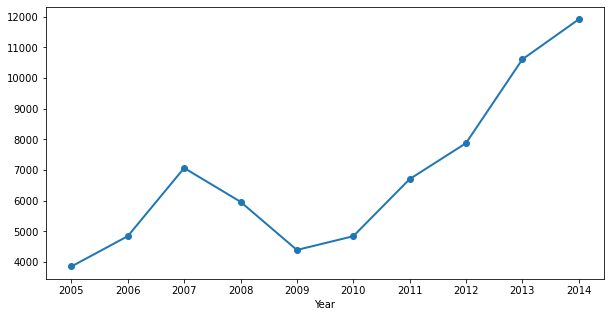

In [28]:
plot_line("LoanOriginalAmount")

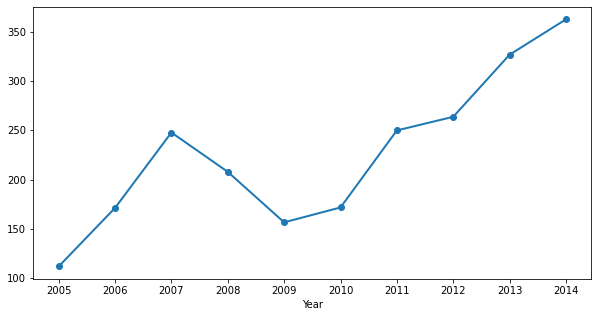

In [29]:
plot_line("MonthlyLoanPayment")

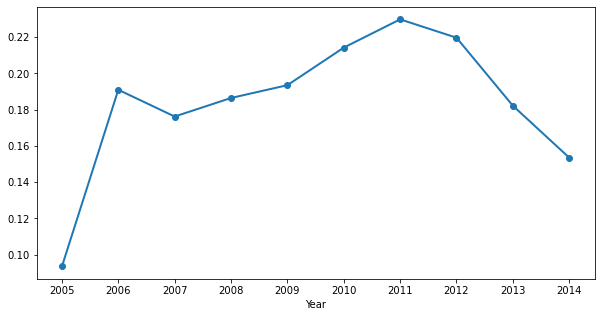

In [30]:
plot_line("BorrowerRate")

Loan original amount and monthly payment sees similar trends over the years (this is expected because of the positive relationship seen earlier in the scatter plot), there is a steep growth from 2005 -2007, then a sharp decline through 2009 we finally see steady increase up till 2014. The reverse is the case for borrower rate this makes sense because of the negative relationship with original loan payment as seen in the heatmap earlier

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Looking at the distribution of loan status and loan original amount, it was interesting to note that the cancelled has a wide PDF with most of the values occuring between 0 - 5000 which could imply that lower amount of loans taken are more likely to get cancelled.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was interesting to note from the distribution between credit grade and loan original amount that those with higher ratings > There was also a positive relationship seen between monthly loan payment and loan original amount 
> Looking at the relationship with borrower rate and original loan amount, there is a negative relationship

## Multivariate Exploration

Let's see how the different categorical variables interact with the numerical variables

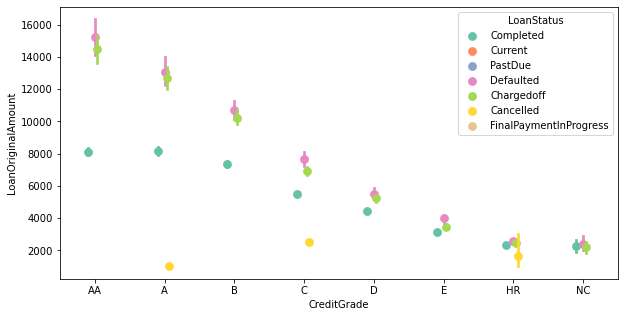

In [31]:
plt.figure(figsize=(10,5))
sb.pointplot(data=loan_df, x="CreditGrade", y="LoanOriginalAmount", hue="LoanStatus", palette = "Set2", linestyles = "", 
             dodge=0.2);

Looking at the relationship between credit grade and loan status on loan original amount, we can see:
* across all ratings there are loans with completed status though the average amount completed gets lower as the ratings reduce. 
* the defaulted loan status is seen across all ratings, the error bars in ratings AA-C means there fewer loans of that status.
* the chargedoff loan status (this means loan written of as bad debt) is predominant across all ratings, the error bars in ratings AA-B means they have fewer loans of that status.
* the cancelled loan status is seen in the A, C and HR rating for very low loan amounts, the error bars in rating HR mean there is fewer loan amount of that status.

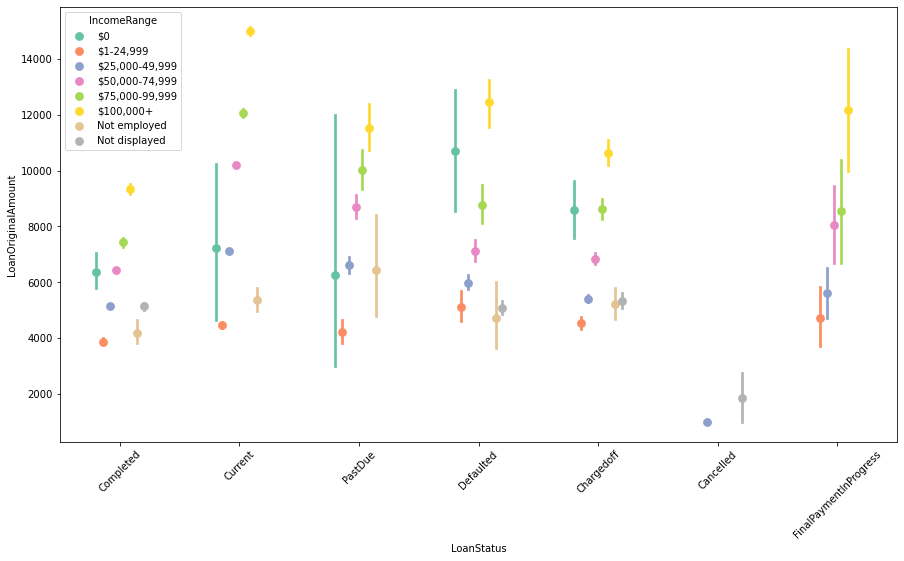

In [32]:
plt.figure(figsize=(15,8))
sb.pointplot(data=loan_df, x="LoanStatus", y="LoanOriginalAmount", hue="IncomeRange", palette="Set2", linestyles="",
            dodge=0.4)
plt.xticks(rotation=45);

For the different loan status and income ranges and how they relate to loan original amount, we can see:
* For completed loan status all income ranges are present and the average loan amount are less than 10000
* For current loan status running, income ranges \\$0-$100,000+ are seen here including the unemployed category. There is a large error bar \\$0 income category whuch means only few people in this category have loans currently running
* For past due income ranges \\$0-100,000+ including the unemployed category are present here there are error bars present indicating the frequency of people in the category
* For defaulted all income ranges are present and the error bars present indicate the frequency of people in the category
* For chargedoff loan status, all income ranges are present though the \\$0 category has error bars which indicated they are few
* For cancelled loan status, there are just those in the income range \\$25,000-49,999 and income not displayed category
* For final payment in progress have income ranges \\$1 -24,999, \\$25,000-49,999, \\$50,000-74,999, \\$75,000-99,999, \\$100,000+ but with large error brs which indicates they are few 

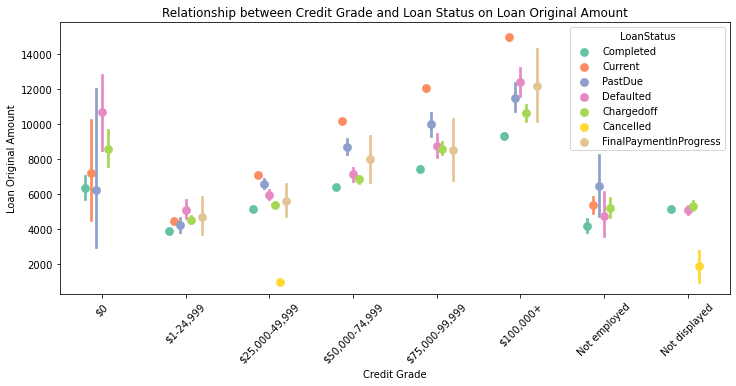

In [33]:
plt.figure(figsize=(12,5))
sb.pointplot(data=loan_df, x="IncomeRange", y="LoanOriginalAmount", hue="LoanStatus", palette="Set2", linestyles="",
            dodge=0.4)
plt.xticks(rotation=45)
plt.title("Relationship between Credit Grade and Loan Status on Loan Original Amount")
plt.xlabel("Credit Grade")
plt.ylabel("Loan Original Amount");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here we got to see how the categorical variables, credit grade, income range and loan status interacted with the numeric variable original loan amount
> * For credit grade and loan status relating to original loan amount, higher ratings (AA-B) are allowed a higher amount of loan to be taken, we see the coplted status across these ratings with also the default and chargedoff status but there are error bars which indicte only a few of the ratings have these statuses. So we can say lower ratings are more likely to default on their loans.
> * For the income range, the different loan statuses are present in some way across all the ranges, it is worthy to note the income ranges do not really seem to affect the loan outcome status


## Conclusions
> We explored a data set containing 113,937 loans with 81 variables on each loan, including loan amount, interest rate, current loan status, borrower income.
>
> The following variables were the main focus during this exploration: `LoanStatus`, `CreditGrade`, `IncomeRange`, `LoanOriginalAmount`, `BorrowerRate` and `MonthlyLoanPayment`
>
> We looked at the distribution of the different variables and relationships between them.
> * The distribution between loan status (cancelled) and loan original amount has a wide PDF with most of the values occuring between 0 - 5000, this could imply that lower amount of loans taken are more likely to get cancelled.
> * We could also deduce from the distribution between credit grade and loan original amount that those with higher ratings (AA-B) have access to higher loan amounts than the other ratings
> * Looking at the income range relating to the loan original amount, there was more frequency in loans taken by those with low income ranges (\\$0 - $49999), unemployed or didn't disclose income info over those with higher income ranges (\\$50,000-100,000+)
> * Monthly loan payment has a positive relationship with loan original amount while borrower rate has a negative relationship with original loan amount